### Visualization of local subgraph

In [1]:
import torch
from attention_analysis_utils import (
    get_attention_raw_dict,
    process_attention_dict,
    get_att_dict_per_layer,
    get_computation_graph,
    get_nodes_per_level_from_comp_graph_full,
    reindex_nodes_per_level,
    translate_comp_graph,
)
from visualization_utils import (
    visualize_computation_graph,
    draw_local_comp_graph_with_ground_truth_path,
)
from torch_geometric.utils import get_num_hops

# device = torch.device("cpu")
# Load the network data locally (for reproduction)
data = torch.load("/workspace/Infection_dataset_small.pt", map_location="cpu")
# Load model as a whole
model = torch.load("/workspace/GAT_infection_small.pt", map_location="cpu")
model.eval()

GAT_L2(
  (conv1): GATConv(2, 8, heads=1)
  (conv2): GATConv(8, 5, heads=1)
)

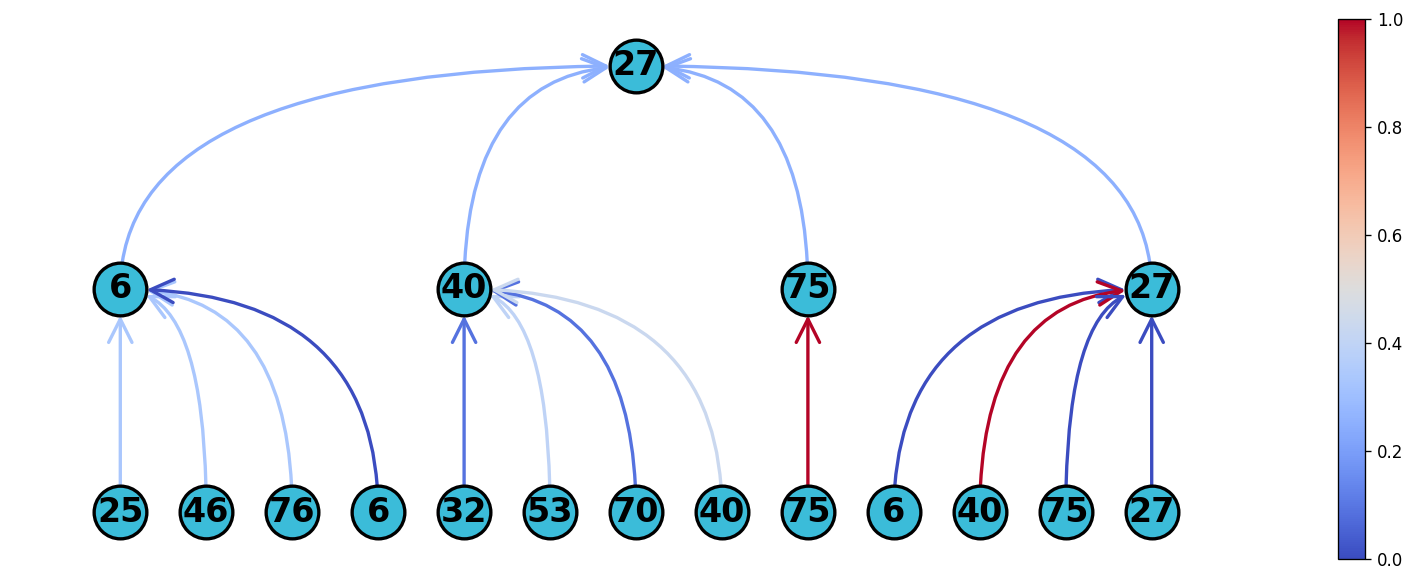

In [5]:
target_idx = 27
num_layers = get_num_hops(model)

att_dict_raw = get_attention_raw_dict(model, data)
att_dict = process_attention_dict(att_dict_raw)
comp_graph = get_computation_graph(
    edge_index=data.edge_index, k=num_layers, target_idx=target_idx
)
(
    nodes_per_level_original,
    num_nodes_per_level,
    true_node_label,
) = get_nodes_per_level_from_comp_graph_full(comp_graph=comp_graph)
nodes_per_level_new = reindex_nodes_per_level(
    nodes_per_level_original, num_nodes_per_level
)
comp_graph_new = translate_comp_graph(
    comp_graph=comp_graph,
    nodes_per_level_new=nodes_per_level_new,
    nodes_per_level_original=nodes_per_level_original,
)
layer_att_dict = get_att_dict_per_layer(
    comp_graph=comp_graph, comp_graph_new=comp_graph_new, att_dict=att_dict
)
visualize_computation_graph(
    layer_att_dict=layer_att_dict,
    nodes_per_level_new=nodes_per_level_new,
    true_node_label=true_node_label,
    arrowsize=35,
    arrowstyle="->",
)

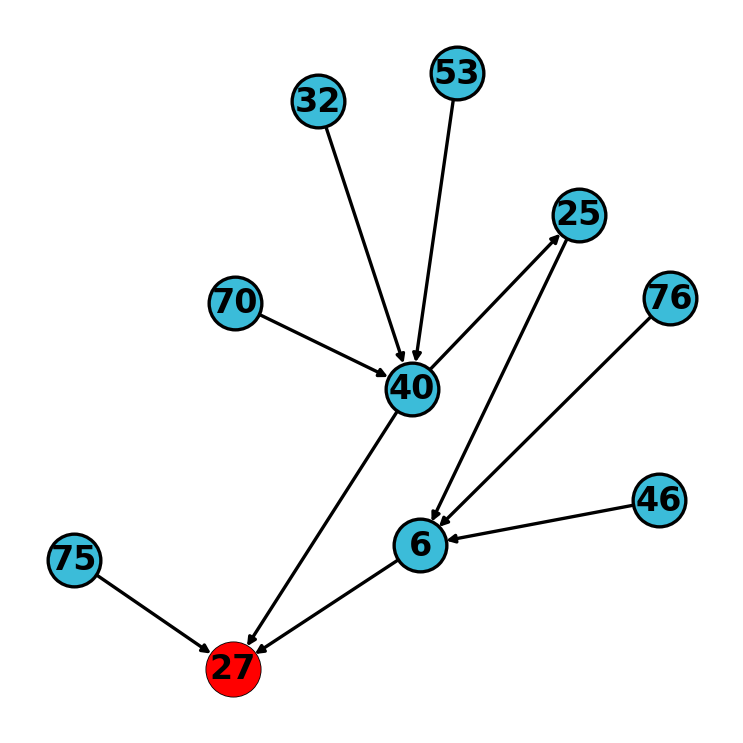

In [4]:
draw_local_comp_graph_with_ground_truth_path(
    data=data, hops=2, target_idx=target_idx, ground_truth=False
)